In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
data = pd.read_csv('driver-data.csv')

In [3]:
# Create an instance of the KMeans class
model = KMeans(n_clusters=2)

In [4]:
# Fit and predict
predictions = model.fit_predict(data[['mean_dist_day','mean_over_speed_perc']])

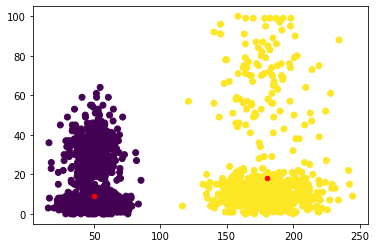

In [5]:
# Plot the data and the clusters
plt.scatter(data['mean_dist_day'], data['mean_over_speed_perc'], c=predictions)
# Plot the cluster centers
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=1)
plt.show()

## Elbow Method

sse : Sum of squared distances from each point to its assigned center (inertia)

In [6]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

In [7]:
sse

[12184626.12962798,
 1316420.8509477177,
 1043387.876268462,
 719601.5383469043,
 534642.4803278439,
 372847.88399386563,
 319742.7652422171,
 276962.05511991744,
 252728.66648281936]

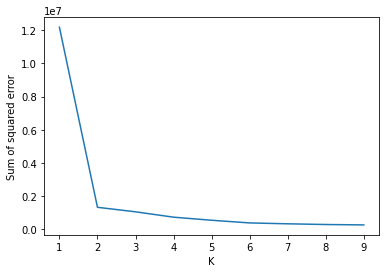

In [8]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

##### The Silhouette score ranges from -1 to 1. A score of 1 indicates that the clusters are well-seperated and distinct, while a score of -1 indicates that the samples have been assigned to the wrong clusters. A score of 0 indicates that the clusters are overlapping.

In [9]:
# Calculate performance metrics
from sklearn.metrics import silhouette_score

In [10]:
score = silhouette_score(data, predictions)
print(score)

0.012412354272262572
